In [1]:
import pandas_datareader as pdr

In [2]:
import csv


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('tataglbl.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1=df.reset_index()['Last']

In [8]:
df1

0       233.50
1       233.80
2       235.00
3       236.25
4       234.00
         ...  
2030    118.80
2031    117.10
2032    120.35
2033    120.75
2034    121.10
Name: Last, Length: 2035, dtype: float64

In [10]:
df1.shape

(2035,)

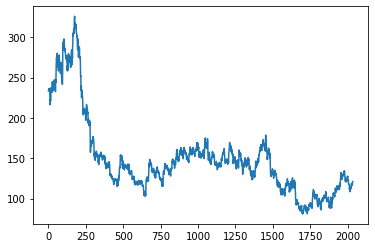

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.62257604]
 [0.62380078]
 [0.62869973]
 ...
 [0.16064503]
 [0.16227802]
 [0.16370688]]


In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(1322, 713)

In [17]:
train_data

array([[0.62257604],
       [0.62380078],
       [0.62869973],
       ...,
       [0.25290876],
       [0.26005307],
       [0.2567871 ]])

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense,LSTM
from tensorflow.python.keras.models import Sequential

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 22s 562ms/step - loss: 0.0332 - val_loss: 0.0035
Epoch 2/100
20/20 [==============================] - 10s 482ms/step - loss: 0.0038 - val_loss: 9.7817e-04
Epoch 3/100
20/20 [==============================] - 10s 481ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 9s 451ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 8s 419ms/step - loss: 0.0013 - val_loss: 9.0537e-04
Epoch 6/100
20/20 [==============================] - 8s 400ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 9s 478ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 8s 406ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/100
20/20 [==============================] - 11s 527ms/step - loss: 0.0012 - val_loss: 7.6223e-04
Epoch 10/100
20/20 [==============================] - 9s 431ms/step - loss:

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.8.0-rc1'

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.85443878016105

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

116.58419112748739

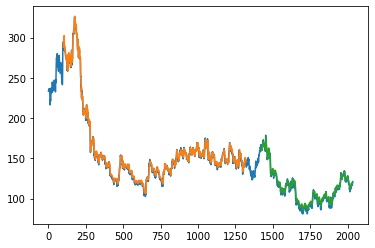

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

713

In [37]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [39]:
temp_input

[0.12410696060420495,
 0.13798734435599097,
 0.14166156358440496,
 0.13778322106552354,
 0.1326801388038375,
 0.14104919371300262,
 0.13676260461318634,
 0.1306389058991631,
 0.13104715248009796,
 0.1306389058991631,
 0.12451520718513981,
 0.14696876913655849,
 0.14798938558889568,
 0.15513370075525618,
 0.13921208409879565,
 0.15717493365993057,
 0.16125739946927942,
 0.1796284956113492,
 0.178607879159012,
 0.19310063278220047,
 0.20902224943866088,
 0.1906511532965911,
 0.18044498877321902,
 0.1824862216778934,
 0.17697489283527246,
 0.17677076954480508,
 0.18044498877321902,
 0.1775872627066748,
 0.17595427638293526,
 0.19840783833435394,
 0.19044703000612373,
 0.18738518064911203,
 0.19432537252500504,
 0.1967748520106144,
 0.20228618085323535,
 0.1967748520106144,
 0.20004082465809347,
 0.199836701367626,
 0.20208205756276787,
 0.21310471524800978,
 0.21555419473361914,
 0.2049397836293121,
 0.21739130434782605,
 0.21269646866707492,
 0.21535007144315166,
 0.19799959175341908,
 0

In [40]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)    

[0.16625309]
101
1 day input [0.13798734 0.14166156 0.13778322 0.13268014 0.14104919 0.1367626
 0.13063891 0.13104715 0.13063891 0.12451521 0.14696877 0.14798939
 0.1551337  0.13921208 0.15717493 0.1612574  0.1796285  0.17860788
 0.19310063 0.20902225 0.19065115 0.18044499 0.18248622 0.17697489
 0.17677077 0.18044499 0.17758726 0.17595428 0.19840784 0.19044703
 0.18738518 0.19432537 0.19677485 0.20228618 0.19677485 0.20004082
 0.1998367  0.20208206 0.21310472 0.21555419 0.20493978 0.2173913
 0.21269647 0.21535007 0.19799959 0.18983466 0.17636252 0.17391304
 0.16350276 0.16431925 0.17187181 0.17370892 0.1796285  0.17391304
 0.1612574  0.16942233 0.178812   0.17207593 0.16901408 0.17187181
 0.17513778 0.18309859 0.19024291 0.18595632 0.19003878 0.1735048
 0.1673811  0.16921821 0.17023882 0.16227802 0.15064299 0.15207185
 0.15105123 0.14696877 0.14594815 0.14553991 0.12390284 0.13206777
 0.11226781 0.119208   0.12655644 0.13512962 0.12982241 0.13431313
 0.12676056 0.1314554  0.12737293 0.

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
import matplotlib.pyplot as plt

In [43]:
len(df1)

2035

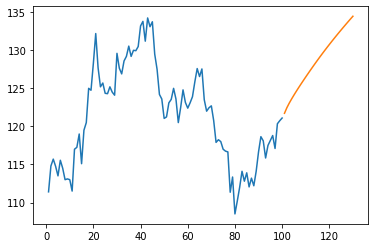

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

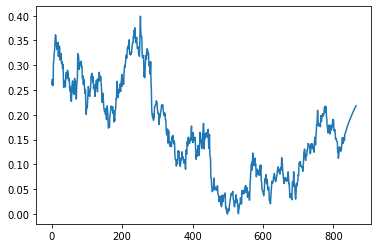

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

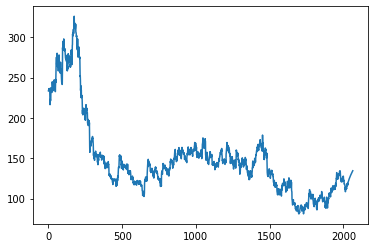

In [47]:
plt.plot(df3)